In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from statsmodels.formula.api import ols

In [5]:
from statsmodels.stats.anova import _get_covariance,anova_lm
import matplotlib as plt
import seaborn as sns

In [6]:
diet=pd.read_csv("E:/Diet.csv")

In [7]:
diet

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3
...,...,...,...,...
73,M,C,83,80.2
74,M,C,84,79.9
75,M,C,85,79.7
76,M,C,87,77.8


In [8]:
diet['Diet'].value_counts()

B    27
C    27
A    24
Name: Diet, dtype: int64

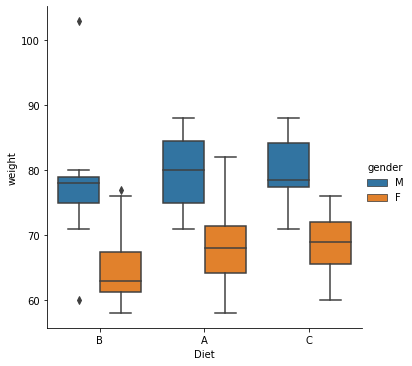

In [10]:
sns.catplot(x="Diet", y="weight", hue='gender', kind="box", data=diet)


In [11]:
formula= 'weight6weeks ~ C(gender)'
model= ols(formula,diet).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,2854.201553,2854.201553,66.162186,6.097209e-12
Residual,76.0,3278.599601,43.139468,NaN,NaN


In [12]:
formula= 'weight ~ C(gender)'
model= ols(formula,diet).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,2804.058685,2804.058685,69.748365,2.334759e-12
Residual,76.0,3055.390033,40.202500,NaN,NaN


In [13]:
formula= 'weight6weeks ~ C(gender) + C(Diet)'
model= ols(formula,diet).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,2854.201553,2854.201553,65.765339,8.037802e-12
C(Diet),2.0,67.015520,33.507760,0.772072,4.657403e-01
Residual,74.0,3211.584082,43.399785,NaN,NaN


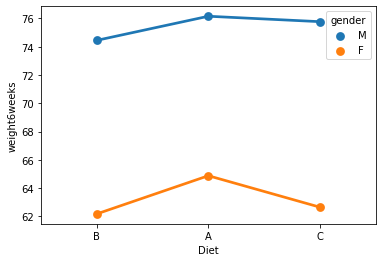

In [14]:
sns.pointplot(x='Diet', y='weight6weeks', data=diet, hue='gender',ci=None);

In [15]:
formula= 'weight6weeks ~ C(gender) + C(Diet)+ C(gender):C(Diet)'
model= ols(formula,diet).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,2854.201553,2854.201553,64.198902,1.453627e-11
C(Diet),2.0,67.015520,33.507760,0.753682,4.743066e-01
C(gender):C(Diet),2.0,10.555631,5.277816,0.118713,8.882364e-01
Residual,72.0,3201.028451,44.458728,NaN,NaN
